In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def load_data(file_path="data/AAPL_stock.csv"):
    # Skip first two rows and load dataset
    df = pd.read_csv(file_path, skiprows=2)
    
    # Rename columns
    df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
    
    # Convert Date to datetime
    df["Date"] = pd.to_datetime(df["Date"])
    
    # Ensure numeric columns are correct dtype
    df[["Open", "High", "Low", "Close", "Volume"]] = df[["Open", "High", "Low", "Close", "Volume"]].apply(pd.to_numeric)
    
    # Set Date as index
    df.set_index("Date", inplace=True)
    
    # Sort by date
    df.sort_index(inplace=True)
    
    return df

# Load dataset
data = load_data("data/AAPL_stock.csv")
data.head()

# Notes:
# - Download historical stock data as CSV from sources like Yahoo Finance (e.g., AAPL for 3 years).
# - For runs, 'total occurrences' interpreted as total days in up/down runs.
# - Adjust window size or file path as needed.
# - This code is modular, readable, and includes comments.
# - For the report, include these functions, results, plots, and interpretations.
# - Reflection: Time management - Planned weekly milestones; Technical challenge - Highlighting runs visually, solved with Matplotlib LineCollection; Other - Learned data analysis with Pandas.

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
2020-01-08,73.224403,73.526295,71.768079,71.768079,132079200


In [4]:
def compute_daily_returns(df, column='Close'):
    """
    Compute simple daily returns: (P_t - P_{t-1}) / P_{t-1}
    """
    df['Return'] = df[column].pct_change()
    return df

In [5]:
def compute_sma(df, window=5, column='Close'):
    """
    Compute Simple Moving Average (SMA) for a given window size.
    """
    sma_column = f'SMA_{window}'
    df[sma_column] = df[column].rolling(window=window).mean()
    return df

In [6]:
def compute_runs(df, column='Close'):
    """
    Compute upward and downward runs, counts, total days, and longest streaks.
    Returns a dictionary with stats.
    """
    df['Change'] = df[column].diff()
    df['Direction'] = np.sign(df['Change'])  # 1: up, -1: down, 0: no change (treat as break)

    # Group consecutive directions (ignoring 0 for now, treat as break)
    df['Group'] = (df['Direction'] != df['Direction'].shift()).cumsum()
    groups = df.groupby('Group')

    up_runs = []
    down_runs = []
    for name, group in groups:
        if group['Direction'].iloc[0] == 1:
            up_runs.append(len(group))
        elif group['Direction'].iloc[0] == -1:
            down_runs.append(len(group))

    stats = {
        'num_up_runs': len(up_runs),
        'num_down_runs': len(down_runs),
        'total_up_days': sum(up_runs),
        'total_down_days': sum(down_runs),
        'longest_up_streak': max(up_runs) if up_runs else 0,
        'longest_down_streak': max(down_runs) if down_runs else 0
    }
    return stats, df  # Return stats and updated df for highlighting

In [7]:
def compute_max_profit(prices):
    """
    Compute maximum profit with multiple transactions allowed.
    Greedy approach: sum all positive differences.
    """
    profit = 0
    for i in range(1, len(prices)):
        if prices[i] > prices[i-1]:
            profit += prices[i] - prices[i-1]
    return profit

In [8]:
def plot_price_and_sma(df, column='Close', sma_column='SMA_5'):
    """
    Plot daily closing price vs. SMA on the same chart.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column], label='Closing Price')
    plt.plot(df.index, df[sma_column], label=sma_column)
    plt.title('Closing Price vs. SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.savefig('price_vs_sma.png')
    plt.show()

In [9]:
def plot_highlighted_runs(df, column='Close'):
    """
    Plot closing price with upward runs in green and downward in red.
    """
    points = np.array([df.index, df[column]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Colors based on direction
    colors = []
    for i in range(1, len(df)):
        if df['Direction'].iloc[i] == 1:
            colors.append('green')
        elif df['Direction'].iloc[i] == -1:
            colors.append('red')
        else:
            colors.append('black')  # No change

    lc = LineCollection(segments, colors=colors, linewidths=2)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.add_collection(lc)
    ax.autoscale()
    ax.set_title('Closing Price with Up/Down Runs Highlighted')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.grid(True)
    plt.savefig('highlighted_runs.png')
    plt.show()

In [ ]:
def plot_highlighted_runs(df, column='Close'):
    """
    Plot closing price with upward runs in green and downward in red.
    """
    points = np.array([df.index, df[column]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Colors based on direction
    colors = []
    for i in range(1, len(df)):
        if df['Direction'].iloc[i] == 1:
            colors.append('green')
        elif df['Direction'].iloc[i] == -1:
            colors.append('red')
        else:
            colors.append('black')  # No change

    lc = LineCollection(segments, colors=colors, linewidths=2)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.add_collection(lc)
    ax.autoscale()
    ax.set_title('Closing Price with Up/Down Runs Highlighted')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.grid(True)
    plt.savefig('highlighted_runs.png')
    plt.show()

In [ ]:
# Make a function to calculate the maximum profit with multiple transactions allowed
def compute_max_profit(prices):
    """
    Compute maximum profit with multiple transactions allowed.
    Greedy approach: sum all positive differences.
    """
    profit = 0
    for i in range(1, len(prices)):
        if prices[i] > prices[i-1]:
            profit += prices[i] - prices[i-1]
    return profit

Runs Statistics: {'num_up_runs': 321, 'num_down_runs': 322, 'total_up_days': 670, 'total_down_days': 583, 'longest_up_streak': 11, 'longest_down_streak': 8}
Maximum Profit: 1328.6324501037602
Sample Daily Returns:
 Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
Name: Return, dtype: float64


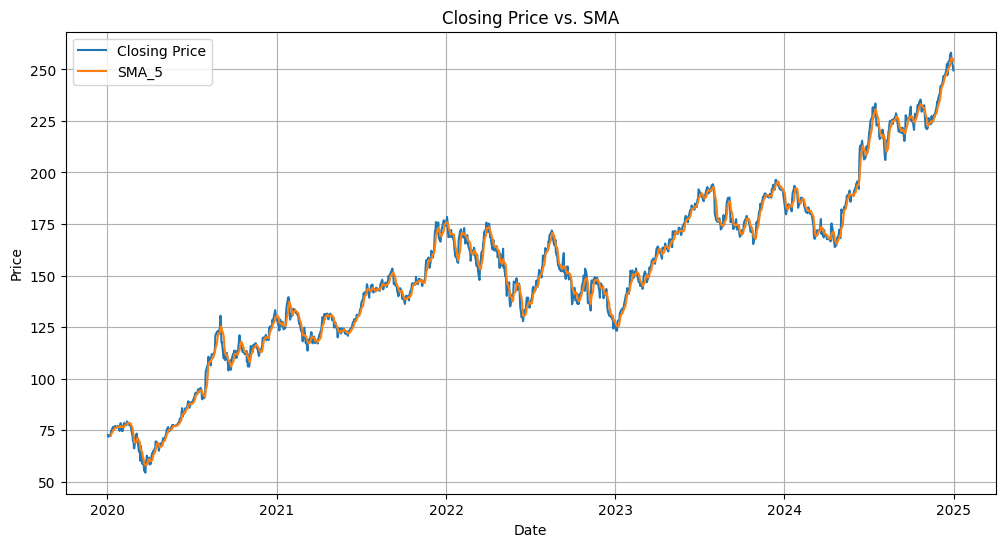

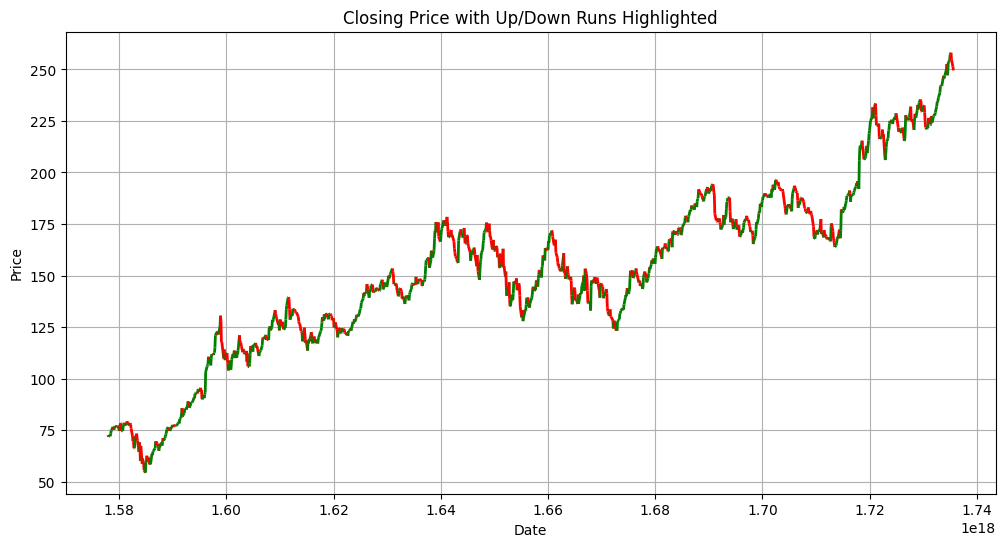

In [15]:
# Example usage (assuming you have a CSV file)
if __name__ == "__main__":
    # Load data (replace with your file path)
    df = load_data('data/AAPL_stock.csv')  # Example: AAPL historical data

    # Compute features
    df = compute_sma(df, window=5)
    df = compute_daily_returns(df)
    runs_stats, df = compute_runs(df)
    max_profit = compute_max_profit(df['Close'].tolist())

    print("Runs Statistics:", runs_stats)
    print("Maximum Profit:", max_profit)
    print("Sample Daily Returns:\n", df['Return'].head())

    # Visualizations
    plot_price_and_sma(df)
    plot_highlighted_runs(df)

    # # Validation with test cases
    # # Test Case 1: Small upward trend
    # test_prices1 = [100, 102, 104, 103, 105]
    # expected_profit1 = (102-100) + (104-102) + (105-103) = 6
    # assert compute_max_profit(test_prices1) == 6, "Test 1 failed"

    # # Test Case 2: Downward trend (no profit)
    # test_prices2 = [105, 103, 101, 100]
    # expected_profit2 = 0
    # assert compute_max_profit(test_prices2) == 0, "Test 2 failed"

    # # Test Case 3: Mixed with multiple transactions
    # test_prices3 = [7, 1, 5, 3, 6, 4]
    # expected_profit3 = (5-1) + (6-3) = 7
    # assert compute_max_profit(test_prices3) == 7, "Test 3 failed"

    # # Test Case 4: All upward
    # test_prices4 = [1, 2, 3, 4, 5]
    # expected_profit4 = 4
    # assert compute_max_profit(test_prices4) == 4, "Test 4 failed"

    # # Test Case 5: Flat then up
    # test_prices5 = [10, 10, 12, 13, 11]
    # expected_profit5 = (12-10) + (13-12) = 3
    # assert compute_max_profit(test_prices5) == 3, "Test 5 failed"

    # print("All test cases passed!")